In [ ]:
"""
scipy是基于numpy的科学计算库，包括 插值、积分、优化、FFT、统计、信号处理、
多维图片处理、IO、数据结构和算法、线代、稀疏特征值问题、特殊函数等子模块
 * Introduction
 * Basic functions
 * Special functions (scipy.special)
 * Integration (scipy.integrate)
 * Optimization (scipy.optimize)
 * Interpolation (scipy.interpolate)
 * Fourier Transforms (scipy.fftpack)
 * Signal Processing (scipy.signal)
 * Linear Algebra (scipy.linalg)
 * Sparse Eigenvalue Problems with ARPACK
 * Compressed Sparse Graph Routines (scipy.sparse.csgraph)
 * Spatial data structures and algorithms (scipy.spatial)
 * Statistics (scipy.stats)
 * Multidimensional image processing (scipy.ndimage)
 * File IO (scipy.io)
"""

In [2]:
# io
import numpy as np
from scipy import io as spio
a = np.ones((3,3))
# spio.savemat('file_path',{'a':a}) # 保存matlab文件为字典格式
# data = spio.loadmat('file_path')
# data['a']
from scipy import misc
# data = misc.imread('123.png') # 读取图片
# matplotlib.pyplot.imread('123.png') # 

# np.loadtxt() / np.savetxt()
# np.genfromtxt() / np.recfromcsv()


In [ ]:
# scipy.special 特殊函数

# scipy.special.jn() 贝塞尔函数
# scipy.special.ellipj() 椭圆函数
# scipy.special.gamma() Gamma函数
# scipy.special.erf() 高斯曲线的面积

In [ ]:
# scipy.linalg

# linalg.det(a)  # 求行列式
# linalg.inv(a)  # 求逆
# u,s,v = linalg.svd(a)  # 奇异值分解, s为a的特征值(一维)，降序排列
                         # t = np.diag(s) ; a == u@t@v

# 其他标准分解，如 QR / LU / Cholesky

In [3]:
# scipy.fftpack: FFT (fft / fftfreq / ifft)
# 用FFT清除噪音，包括图片中的噪音或曲线
from scipy import fftpack

# 一个有噪音的信号
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
       0.5 * np.random.randn(time_vec.size)

# 
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

sig_fft = fftpack.fft(sig)  # array

pidxs = np.where(sample_freq > 0)  # 只需要使用频谱为正的部分
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

freq = freqs[power.argmax()]      # 寻找信号频率
np.allclose(freq, 1./period)      # True 检查是否找到了正确的频率

sig_fft[np.abs(sample_freq) > freq] = 0  # 将高频噪音从傅立叶转换过的信号移除

main_sig = fftpack.ifft(sig_fft)  # 生成过滤过的信号,逆FFT

import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')


c:\users\ljj\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3


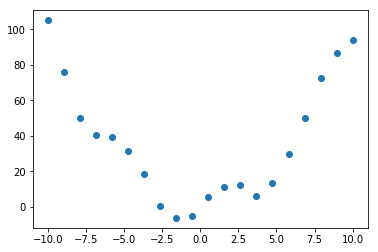

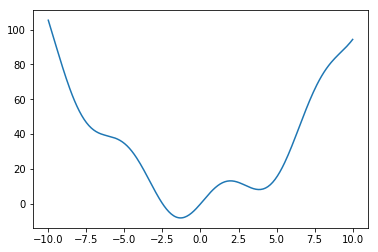

array([3., 5., 9.])

In [4]:
# optimize : fmin_bfgs 梯度下降优化算法
from scipy import optimize
def f(x):
    return x**2 - 2*x
initial_x = 0  # 可能落入局部最小
optimize.fmin_bfgs(f,initial_x)  

# fmin()
# fmin_cg()

# 曲线拟合：curve_fit 最小二乘法
import matplotlib.pyplot as plt
def f1(x):
    return x**2+10*np.sin(x)
xdata = np.linspace(-10,10,20)
ydata = f1(xdata) + np.random.randn(xdata.size)
plt.scatter(xdata,ydata)
plt.show()
def f2(x,a,b):
    return a*x**2+b*np.sin(x)
guess = [2,2]
params,params_covariance = optimize.curve_fit(f2,xdata,ydata,guess)
x1 = np.linspace(-10,10,256)
y1 = f2(x1,params[0],params[1])
plt.plot(x1,y1)
plt.show()

# optimize.fsolve() 求解非线性方程组
from scipy.optimize import fsolve
def func(x):
    x0,x1,x2 = x.tolist()
    return [5*x1-25,5*x0*x0-x1*x2,x2*x0-27]
initial_x = [1,1,1]
result = fsolve(func,initial_x)
result

In [5]:
# scipy.stats 
# ttest_ind  T检验
from scipy import stats
a = np.random.normal(0,1,size=10)
b = np.random.normal(1,1,size=10)
stats.ttest_ind(a,b)

# 直方图和概论密度函数
# 百分位数

Ttest_indResult(statistic=-1.2762166739053644, pvalue=0.21810083317846457)

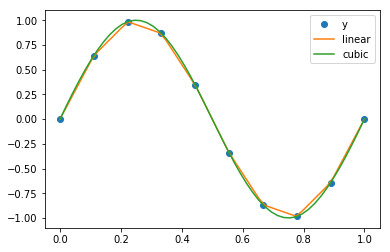

In [6]:
# interpolate
from scipy.interpolate import interp1d
x = np.linspace(0,1,10)
y = np.sin(2*np.pi*x)

linear_interp = interp1d(x,y)  # 线性插值
cubic_interp = interp1d(x,y,kind='cubic')  # 三次方插值


computed_time = np.linspace(0,1,50)
linear_res = linear_interp(computed_time)
cubic_res = cubic_interp(computed_time)

plt.plot(x,y,'o',ms=6,label='y')
plt.plot(computed_time,linear_res,label='linear')
plt.plot(computed_time,cubic_res,label='cubic')
plt.legend()
plt.show()

linear_interp

In [9]:
# scipy.integrate 数值积分
# quad(func,start,end)  返回结果和误差
from scipy.integrate import quad
res,err = quad(np.sin,0,np.pi/2)

# fixed_quad / quadrature / romberg

(0.9999999999999999, 1.1102230246251564e-14)

In [ ]:
# scipy.signal
from scipy import signal
import matplotlib.pyplot as plt
# signal.detrend()  # 删除线性趋势
# signal.resample(x,n)用FFT从信号x中抽出n个点

In [ ]:
# scipy.ndimage
from scipy import ndimage
# 几何变换
# 图像滤波器
# 数学形态学: 腐蚀 扩张 开启 闭合